## Part 1: Neurons and simple neural networks
* https://nest-simulator.readthedocs.io/en/latest/tutorials/pynest_tutorial/part_1_neurons_and_simple_neural_networks.html#pynest-tutorial-1

In [1]:
import scipy

import nest
import matplotlib.pyplot as plt


[admin:1422657] shmem: mmap: an error occurred while determining whether or not /tmp/ompi.admin.1000/jf.0/2906324992/shared_mem_cuda_pool.admin could be created.
[admin:1422657] create_and_attach: unable to create shared memory BTL coordinating structure :: size 134217728 



              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.8.0-post0.dev0
 Built: Oct  2 2024 11:54:50

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



In [2]:

neuron = nest.Create("iaf_psc_alpha")

In [3]:
neuron.get()

{'archiver_length': 0,
 'beta_Ca': 0.001,
 'C_m': 250.0,
 'Ca': 0.0,
 'E_L': -70.0,
 'element_type': 'neuron',
 'frozen': False,
 'global_id': 1,
 'I_e': 0.0,
 'local': True,
 'model': 'iaf_psc_alpha',
 'model_id': 50,
 'node_uses_wfr': False,
 'post_trace': 0.0,
 'recordables': ('I_syn_ex', 'I_syn_in', 'V_m'),
 'synaptic_elements': {},
 't_ref': 2.0,
 't_spike': -1.0,
 'tau_Ca': 10000.0,
 'tau_m': 10.0,
 'tau_minus': 20.0,
 'tau_minus_triplet': 110.0,
 'tau_syn_ex': 2.0,
 'tau_syn_in': 2.0,
 'thread': 0,
 'thread_local_id': -1,
 'V_m': -70.0,
 'V_min': -inf,
 'V_reset': -70.0,
 'V_th': -55.0,
 'vp': 0}

In [4]:
neuron.get("I_e") # the constant background current


0.0

In [5]:
neuron.get(["V_reset", "V_th"])

{'V_reset': -70.0, 'V_th': -55.0}

In [6]:
neuron.set(I_e=376.0) # set the constant background current

In [7]:
#neuron.set({"I_e": 376}) # do not use this syntax, no int but float

In [8]:
neuron.I_e = 376.0 # set the constant background current by attribute
neuron.I_e # object attribute style

376.0

In [9]:
multimeter = nest.Create("multimeter") # create a multimeter device
multimeter.set(record_from=["V_m"]) # record membrane potential

In [10]:
spikerecorder = nest.Create("spike_recorder") # create a spike recorder

In [11]:
nest.Connect(multimeter, neuron)
nest.Connect(neuron, spikerecorder)

* The order in which the arguments to Connect() are specified reflects the flow of events: if the neuron spikes, it sends an event to the spike recorder. Conversely, the multimeter periodically sends requests to the neuron to ask for its membrane potential at that point in time. This can be regarded as a perfect electrode stuck into the neuron.

In [12]:
nest.Simulate(1000.0)


Oct 02 12:46:26 NodeManager::prepare_nodes [Info]: 
    Preparing 3 nodes for simulation.

Oct 02 12:46:26 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 3
    Simulation time (ms): 1000
    Number of OpenMP threads: 1
    Number of MPI processes: 1

Oct 02 12:46:26 SimulationManager::run [Info]: 
    Simulation finished.


In [13]:
dmm = multimeter.get()
Vms = dmm["events"]["V_m"]
ts = dmm["events"]["times"]

In [14]:
dmm.keys() # multimeter dictionary keys

dict_keys(['element_type', 'events', 'frozen', 'global_id', 'interval', 'label', 'local', 'model', 'model_id', 'n_events', 'node_uses_wfr', 'offset', 'origin', 'record_from', 'record_to', 'start', 'stop', 'thread', 'thread_local_id', 'time_in_steps', 'vp'])

In [15]:
dmm["events"].keys() # events dictionary keys

dict_keys(['senders', 'times', 'V_m'])

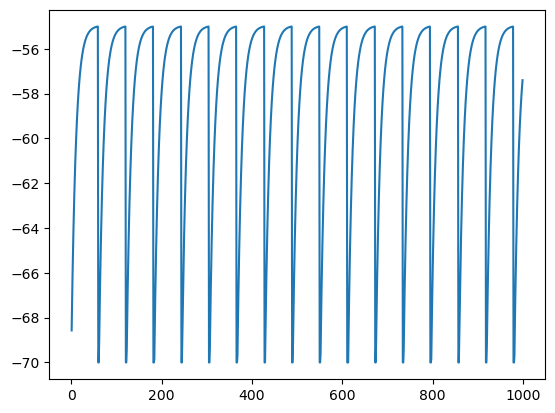

In [16]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot(ts, Vms) # since we input 376.0, the membrane potential keep spiking


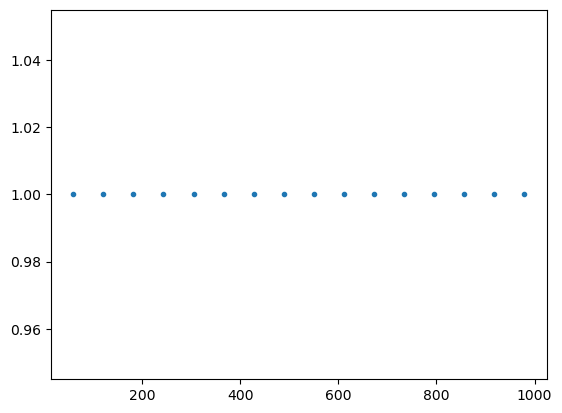

In [17]:
events = spikerecorder.get("events") # spike recorder is also a disctionary
senders = events["senders"]
ts_spikere = events["times"]
plt.figure(2)
plt.plot(ts_spikere, senders, ".")
plt.show()

In [18]:
spikerecorder.get()

{'element_type': 'recorder',
 'events': {'senders': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
  'times': array([ 59.3, 120.6, 181.9, 243.2, 304.5, 365.8, 427.1, 488.4, 549.7,
         611. , 672.3, 733.6, 794.9, 856.2, 917.5, 978.8])},
 'frozen': False,
 'global_id': 3,
 'label': '',
 'local': True,
 'model': 'spike_recorder',
 'model_id': 95,
 'n_events': 16,
 'node_uses_wfr': False,
 'origin': 0.0,
 'record_to': 'memory',
 'start': 0.0,
 'stop': 1.7976931348623157e+308,
 'thread': 0,
 'thread_local_id': 2,
 'time_in_steps': False,
 'vp': 0}